In this exercise, we will be plotting experimental data in Python using 'matplotlib'. (Explain what the purpose is of this exercise, why you will want this as an alternative to excel plots, and what some of the advantages are of using this method.)

# Setup and preparing the data

First we need to import some libraries to setup the script

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Next, we import the data from file to a numpy array using `np.loadtxt`.

In [3]:
results = np.loadtxt('datafiles/Labresults.csv',delimiter=',')

We can also separate the data in 3 seperate numpy arrays (one for each column):

In [4]:
(conc,counts,run) = np.loadtxt('datafiles/Labresults.csv',delimiter=',',unpack=True)
counts

array([  14.,  570., 1302., 2838., 4212., 4590.,  112.,  780., 1523.,
       3301., 4710., 5424.,    0.,  123.,  623., 2450., 3782., 4021.])

Have a look at the data, what is in there?

Next, we need to split the data such that we have one list for each replicate. Have a look at the columns we have just loaded, identify the indices for each run and separate the columns (name them `counts_r1`, `counts_r2` and `counts_r3`). Remember that `a[i:j]` gives you items `i` to `j` (excluding `j`) from `a`.

In [17]:
counts_r1 = counts[:6]
counts_r2 = counts[6:12]
counts_r3 = counts[12:]

Now we have the counts per replicate, but `conc` still contains the concentrations for all values. Create a list of unique concentrations, named `cond_unique`, that matches `counts_r1` (or `counts_r2` or `counts_r3`). You can do this in the same way you created the lists for y-axis, or use `np.unique`.

In [18]:
cond_unique = np.unique(conc)
cond_unique

array([10., 20., 30., 40., 50., 60.])

# Basic line plotting

First, we start by creating a plot for the first run.

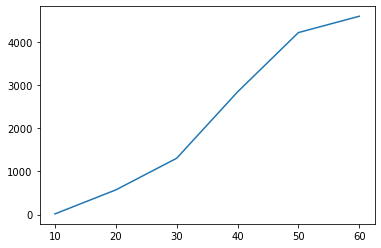

In [19]:
fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique,counts_r1)

This plot is not very informative; we do not know that is on the axes or what is plotted. This can be changed with the `ax.set` function, for example, to add a title we do the following:


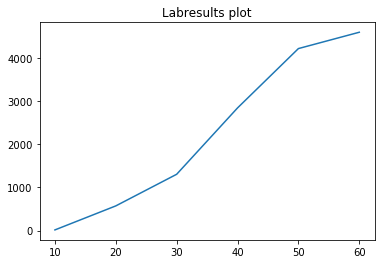

In [20]:
fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique,counts_r1)
ax.set(title='Labresults plot');

Use the arguments `xlabel` and `ylabel` to add labels to the x- and y-axis:

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Concentration'),
 Text(0.5, 1.0, 'Labresults plot')]

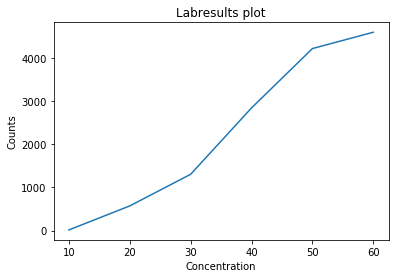

In [21]:
fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique,counts_r1)
ax.set(title='Labresults plot', xlabel = "Concentration", ylabel = "Counts")

Note that the x-axis does not start at zero. The ranges of the axis are controlled with the arguments `xlim` and `ylim` which is set to a list of two values: `[min,max]`. Use the argument `xlim` for `ax.set` such that the x-axis starts at 0.

[Text(0, 0.5, 'Counts'),
 (0, 61),
 Text(0.5, 0, 'Concentration'),
 Text(0.5, 1.0, 'Labresults plot')]

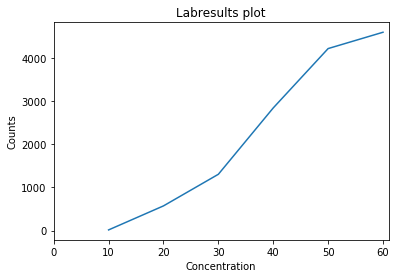

In [22]:
fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique,counts_r1)
ax.set(title='Labresults plot', xlabel = "Concentration", ylabel = "Counts", xlim=[0,61])

To adapt the markers on the axis, we need to modify the ticks. The position the ticks are controlled by `xticks` and `yticks`, the corresponding labels are controlled by `xticklabels` and `yticklabels`. If no tick labels are provides, these are identical to the tick values. Below we show an example of setting the ticks and tick labels for the y-axis:

[[<matplotlib.axis.YTick at 0x7f5d89dd77f0>,
 [Text(0, 0, 'min'), Text(0, 0, 'max')],
 Text(0.5, 1.0, 'Labresults plot')]

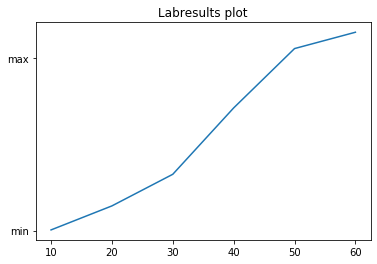

In [23]:
fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique,counts_r1)
ax.set(title='Labresults plot',yticks=[0,4000],yticklabels=['min','max'])

Replace the current ticks on the x-axis with two ticks: one at 10, with the label *minimum concentration* and one at 60 with the label *maximum concentation*.

[[<matplotlib.axis.YTick at 0x7f5d87d76cc0>,
 [Text(0, 0, 'min'), Text(0, 0, 'max')],
 [Text(0, 0, 'minimum concentration'), Text(0, 0, 'maximum concentration')],
 Text(0.5, 1.0, 'Labresults plot')]

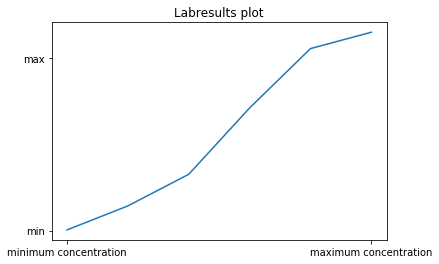

In [24]:
fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique, counts_r1)
ax.set(title='Labresults plot', yticks=[0, 4000], yticklabels=['min', 'max'], xticks=[
       10, 60], xticklabels=['minimum concentration', 'maximum concentration'])


# Multiple lines in one plot

Next, we want to plot the data for the three runs. Every time you run `plot` on the same axis object, a line is added to that axis:

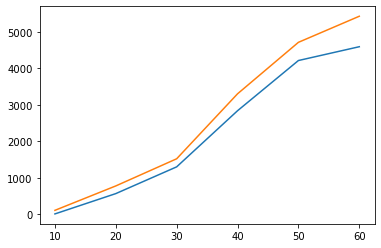

In [25]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(cond_unique,counts_r1)
ax.plot(cond_unique,counts_r2)

Add the third line

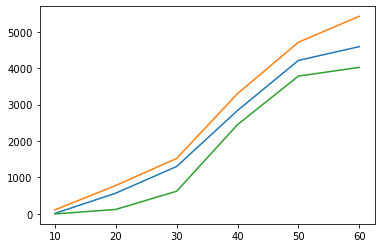

In [26]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(cond_unique,counts_r1)
ax.plot(cond_unique,counts_r2)
ax.plot(cond_unique,counts_r3)


Matplotlib automatically gives a different color to each line. However, you may want to choose that yourself. For this, you can use the `color` argument which can be set to any of the following colors: 

<img src="https://matplotlib.org/_images/named_colors.png">

Use `color` to give the lines the following colors: blue, green, orange.

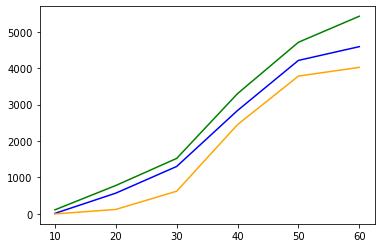

In [28]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(cond_unique,counts_r1, color='blue')
ax.plot(cond_unique,counts_r2, color='green')
ax.plot(cond_unique,counts_r3, color='orange')

Another way to distinguish lines is by using different line styles using the `linestyle` argument, which can be:

<img src="https://matplotlib.org/_images/sphx_glr_line_styles_reference_001.png">

Adapt the plot such that:
* the blue line is dotted
* the green line is dash-dot
* the orange line is dashed

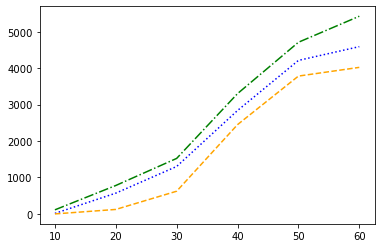

In [29]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
ax.plot(cond_unique, counts_r1, color='blue', linestyle=':')
ax.plot(cond_unique, counts_r2, color='green', linestyle='-.')
ax.plot(cond_unique, counts_r3, color='orange', linestyle='--')


Next, we add markers to the lines to make clear what the actual data is. Use the `marker` to add different markers to each line (possible markers can be found [here](https://matplotlib.org/api/markers_api.html)):

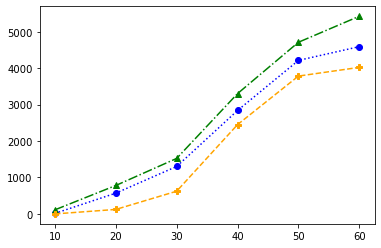

In [30]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
ax.plot(cond_unique, counts_r1, color='blue', linestyle=':', marker='o')
ax.plot(cond_unique, counts_r2, color='green', linestyle='-.', marker='^')
ax.plot(cond_unique, counts_r3, color='orange', linestyle='--', marker='P')

Now we have 3 clearly distinguished line, but we do not know which line represents which data; we net a legend. A legend is added with `ax.legend()`:

No handles with labels found to put in legend.


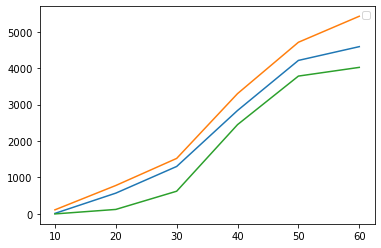

In [31]:
fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique,counts_r1)
ax.plot(cond_unique,counts_r2)
ax.plot(cond_unique,counts_r3)
ax.legend()

However, we need to provide the legend with labels for each line. This can be done with the `label` argument for `ax.plot`, which needs to be set to a string that describes the associated curve. Add a label to each line to create a legend:

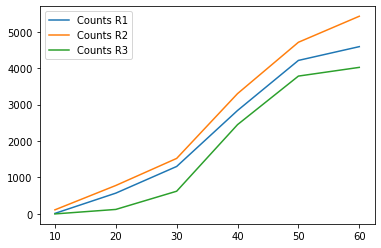

In [32]:
from cProfile import label


fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique,counts_r1, label='Counts R1')
ax.plot(cond_unique,counts_r2, label='Counts R2')
ax.plot(cond_unique,counts_r3, label='Counts R3')
ax.legend()

Matplotlib automatically puts the label at the best position. This can be changes with the `loc` argument of `ax.legend()`. `loc` is a value between 0 and 10, where 0 results in the *best* position. Play with around with `loc` and place the legend in the bottom right corner.

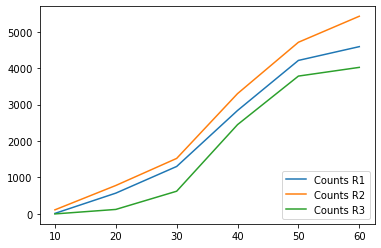

In [33]:
fig = plt.figure()
ax = plt.gca()
ax.plot(cond_unique,counts_r1, label='Counts R1')
ax.plot(cond_unique,counts_r2, label='Counts R2')
ax.plot(cond_unique,counts_r3, label='Counts R3')
ax.legend(loc=4)

# Mean/SD plotting

Next, we want to plot the mean count per concentration with the standard deviation as error bars. For this, we first need to collect the data in a 2D array, such that each row is one run. For this we use the function `np.reshape` which reshapes an array into a given new shape:

In [34]:
# shape (-1,) means 6 columns, and as many rows as needed
cnts = reshape(counts,(-1,6))
print(cnts)

[[  14.  570. 1302. 2838. 4212. 4590.]
 [ 112.  780. 1523. 3301. 4710. 5424.]
 [   0.  123.  623. 2450. 3782. 4021.]]


Now, we can use `np.mean` the mean. Run the following code:

In [35]:
np.mean(cnts)

2243.0555555555557

`np.mean` has an argument `axis` which specifies over which axis the mean should be computed. For a 2D array, axis can either be 0 or 1. Try both, and see which one gives the expected result.

In [38]:
np.mean(cnts, axis=1)

array([2254.33333333, 2641.66666667, 1833.16666667])

The standard deviation can be computed with `np.std`, which works in the same way as `np.mean`. Use `np.std` to compute the standard deviation per concentration.

In [40]:
np.std(cnts, axis=0)

array([ 49.82636518, 273.97445136, 382.95372508, 347.8687492 ,
       379.19329577, 576.16799248])

Next, we plot the mean:

1. store the mean in a variable named `mu`
2. create a figure and `ax`
3. plot `mu` against the concentration
4. annotate the plot

[Text(0, 0.5, 'Count'),
 (0, 61),
 Text(0.5, 0, 'Concentration'),
 Text(0.5, 1.0, 'mean')]

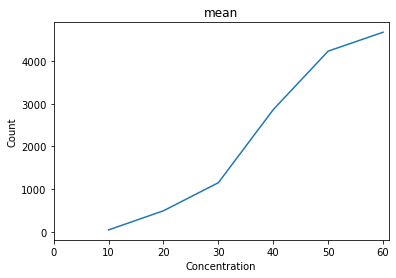

In [42]:
mu=np.mean(cnts, axis=0)
fig=plt.figure()
ax = plt.gca()
ax.plot(cond_unique, mu)
ax.set(title='mean', xlabel='Concentration',ylabel='Count', xlim=[0,61])

To add error bars, we to replace the `plot` function with the `errorbar` function. 

1. store the standard deviation in a variable named `sd`
2. create a figure and `ax`
3. plot `mu` against the concentration with errorbars: `ax.errorbar(cond_unique,mu,yerr=sd)`
4. annotate the plot

[Text(0, 0.5, 'Count'),
 (0, 61),
 Text(0.5, 0, 'Concentration'),
 Text(0.5, 1.0, 'mean')]

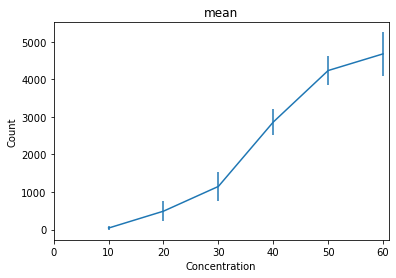

In [46]:
sd = np.std(cnts, axis=0)
mu = np.mean(cnts, axis=0)
fig = plt.figure()
ax = plt.gca()
ax.errorbar(cond_unique, mu, yerr=sd)
ax.set(title='mean', xlabel='Concentration', ylabel='Count', xlim=[0, 61])

# Bar Charts

We can plot this in a bar chart as well, using the function `plt.bar` which works similar to `plt.plot`:

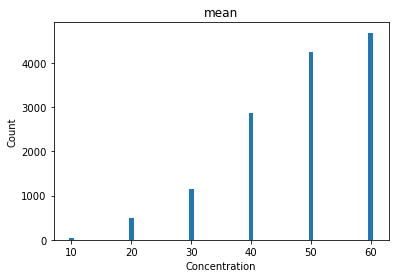

In [47]:
fig = plt.figure()
ax = plt.gca()
ax.bar(cond_unique,mu)
ax.set(title='mean',xlabel='Concentration',ylabel='Count');

These bars are very narrow. The width of the bars can be changes with the `width`, use this to set the width to 8:

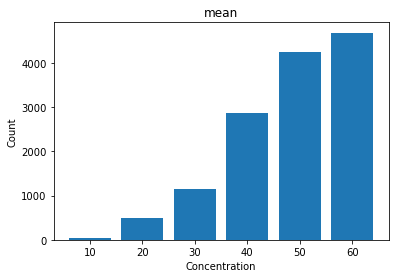

In [48]:
from turtle import width


fig = plt.figure()
ax = plt.gca()
ax.bar(cond_unique,mu, width=8)
ax.set(title='mean',xlabel='Concentration',ylabel='Count')

Next, use the `yerr` argument to add error bars:

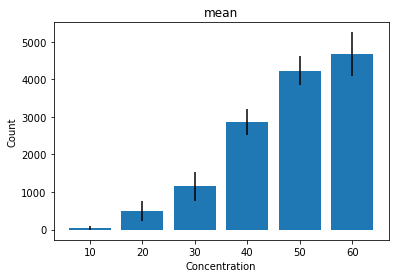

In [49]:
from turtle import width


fig = plt.figure()
ax = plt.gca()
ax.bar(cond_unique,mu, width=8, yerr=sd)
ax.set(title='mean',xlabel='Concentration',ylabel='Count')

Alternatively, you could put all data in one bar plot. Like with the plot command, this can be done by adding a `ax.bar` command for each run. Run the code below, what happens?

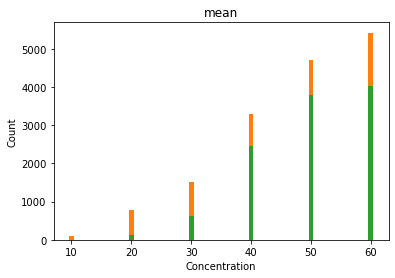

In [50]:
fig = plt.figure()
ax = plt.gca()
ax.bar(cond_unique,counts_r1)
ax.bar(cond_unique,counts_r2)
ax.bar(cond_unique,counts_r3)
ax.set(title='mean',xlabel='Concentration',ylabel='Count')

We need to define unique x-coordinates for each set of bars, which can be done by shifting the x-coordinates of each subsequent plot further to the right. Remember that you can add values to an array with `+` and that you can specify the width with the `width` argument. Use this to plot create a bar chart containing the 3 runs without overlapping bars. Use `label` and legend (like before) to add a legend.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Concentration'), Text(0.5, 1.0, 'mean')]

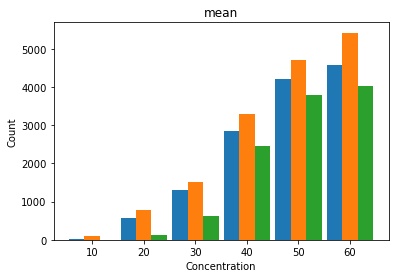

In [52]:
bar_width = 3
fig = plt.figure()
ax = plt.gca()
ax.bar(cond_unique - bar_width, counts_r1, width=bar_width, label='run 1')
ax.bar(cond_unique, counts_r2, width=bar_width, label='run 2')
ax.bar(cond_unique + bar_width, counts_r3, width=bar_width, label='run 3')
ax.set(title='mean', xlabel='Concentration', ylabel='Count')


# Exporting figures

To finalize our plots and use them in future documents, we can save them using `plt.savefig`. This function has one mandatory argument, the filename, which must include the extension because matplotlib uses this to set the image format. Use `plt.savefig` to export a plot as a png and as a svg.

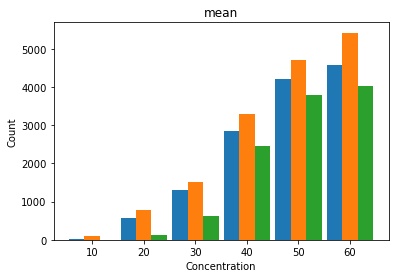

In [53]:
bar_width = 3
fig = plt.figure()
ax = plt.gca()
ax.bar(cond_unique - bar_width, counts_r1, width=bar_width, label='run 1')
ax.bar(cond_unique, counts_r2, width=bar_width, label='run 2')
ax.bar(cond_unique + bar_width, counts_r3, width=bar_width, label='run 3')
ax.set(title='mean', xlabel='Concentration', ylabel='Count')

plt.savefig('plot.png')
plt.savefig('plot.svg')